In [135]:
import requests # Python package to send get/post requests to a webpage
import os       # Python package to interface with the operating system
from operator import itemgetter
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from collections import Counter
API_KEY = os.environ['Spoontacular_API_KEY']

In [2]:
recipe_file = open('/home/katie/01-OneDrive/01_galvanize_dsi/capstones/02-capstone_2/capstone2/data/recipes_raw.txt', 'r')

In [3]:
full_recipes = recipe_file.read()
full_recipes2 = full_recipes.replace('}{"vegetarian' , '}|||{"vegetarian')
full_recipes_lst = full_recipes2.split("|||")

In [4]:
full_recipes_json = []
for recipe in full_recipes_lst:
   full_recipes_json.append(json.loads(recipe))

In [5]:
ingredients_lst = []
for recipe in full_recipes_json:
    ingredients = []
    for ingredient in recipe['extendedIngredients']:
        ingredients.append(ingredient['name'])
        
    ingredients_lst.append(ingredients)

In [6]:
for recipe in ingredients_lst:
    for idx, ingredient in enumerate(recipe):
        recipe[idx] = ingredient.lower().replace(" ", "")

In [7]:
ingredients_strs = []
for recipe in ingredients_lst:
    ingredients_strs.append(" ".join(recipe).lower())

In [76]:
all_cuisines = ['african', 'chinese', 'japanese', 'korean', 'vietnamese', 'thai', 'indian', 'british',
    'irish', 'french', 'italian', 'mexican', 'spanish', 'middle+eastern', 'jewish', 'american', 'cajun',
    'southern', 'greek', 'german', 'nordic', 'eastern+european', 'caribbean', 'latin+american']
y = []
for label in all_cuisines:
    i = 0
    while i <= 19:
        y.append(label)
        i += 1

encoder = preprocessing.LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(y_encoded)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  3  3  3  3  3  3  3  3  3

In [9]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(ingredients_strs)

In [10]:
clf = MultinomialNB()
clf.fit(X_tfidf, y_encoded)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [128]:
vectorizer = CountVectorizer()

In [129]:
testing_counts_X = vectorizer.fit_transform(ingredients_strs)

In [11]:
predictions = clf.predict(X_tfidf)

In [12]:
accuracy = clf.score(X_tfidf, y_encoded)

In [16]:
residuals = y_encoded - predictions
residuals

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, -12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        -9,   0,   0,   0,   0,   0,   0,   0,   0, -15,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [19]:
incorrect_prediction_idxs = np.argwhere(residuals != 0)

In [23]:
incorrect_prediction_idxs = incorrect_prediction_idxs.flatten()

In [26]:
incorrectly_classified_titles = []
for idx in incorrect_prediction_idxs:
    incorrectly_classified_titles.append(full_recipes_json[idx]['title'])
incorrectly_classified_titles

['NITK’s Red Curry Dragon Bowl // Gluten & Dairy Free',
 'Beef Wellington Braciole for #SundaySupper',
 'Fish and Chips Tacos {Blog Party and Giveaway}',
 'Spinach flan',
 'Salmon with Sweet Chili Glaze, Sugar Snap Peas, and Pea Tendrils',
 'Swedish Pot Roast',
 'Romanian meatballs (Chiftele)',
 'Slow Cooker Carne Asada']

In [60]:
for idx in incorrect_prediction_idxs:
    print(f"{full_recipes_json[idx]['title']}")
    print(f"Predicted: {encoder.inverse_transform(predictions)[idx]}")
    print(f"True Cuisine: {y[idx]}")

NITK’s Red Curry Dragon Bowl // Gluten & Dairy Free
Predicted: thai
True Cuisine: indian
Beef Wellington Braciole for #SundaySupper
Predicted: irish
True Cuisine: british
Fish and Chips Tacos {Blog Party and Giveaway}
Predicted: mexican
True Cuisine: british
Spinach flan
Predicted: nordic
True Cuisine: spanish
Salmon with Sweet Chili Glaze, Sugar Snap Peas, and Pea Tendrils
Predicted: chinese
True Cuisine: american
Swedish Pot Roast
Predicted: irish
True Cuisine: nordic
Romanian meatballs (Chiftele)
Predicted: nordic
True Cuisine: eastern+european
Slow Cooker Carne Asada
Predicted: mexican
True Cuisine: latin+american


In [97]:
np.exp(clf.feature_log_prob_)

array([[0.00079276, 0.00079276, 0.00079276, ..., 0.00079276, 0.00079276,
        0.00079276],
       [0.00079539, 0.00079539, 0.00079539, ..., 0.00079539, 0.00079539,
        0.00079539],
       [0.00080059, 0.00080059, 0.0010872 , ..., 0.00080059, 0.00080059,
        0.00080059],
       ...,
       [0.00079745, 0.00079745, 0.00079745, ..., 0.00079745, 0.00079745,
        0.00079745],
       [0.00079496, 0.00079496, 0.00079496, ..., 0.00079496, 0.00101597,
        0.00079496],
       [0.00079514, 0.00079514, 0.00079514, ..., 0.00079514, 0.00079514,
        0.00079514]])

In [96]:
prob_sorted = clf.feature_log_prob_[12, :].argsort()
np.take(tfidf.get_feature_names(), prob_sorted[-10: : 1])

array(['kale', 'salt', 'oregano', 'garlic', 'shreddedmozzarellacheese',
       'onion', 'cannedtomatoes', 'lasagnanoodles', 'oliveoil',
       'parmesancheese'], dtype='<U31')

In [81]:
len(prob_sorted)

1187

In [85]:
encoder.classes_

array(['african', 'american', 'british', 'cajun', 'caribbean', 'chinese',
       'eastern+european', 'french', 'german', 'greek', 'indian', 'irish',
       'italian', 'japanese', 'jewish', 'korean', 'latin+american',
       'mexican', 'middle+eastern', 'nordic', 'southern', 'spanish',
       'thai', 'vietnamese'], dtype='<U16')

In [101]:
train_cuisines = ['african', 'chinese', 'japanese', 'korean', 'vietnamese', 'thai', 'indian', 'british',
    'irish', 'french', 'italian', 'mexican', 'spanish', 'middle+eastern', 'jewish', 'american', 'cajun',
    'southern', 'greek', 'german', 'nordic', 'eastern+european', 'caribbean', 'latin+american']

test_cuisines = ['chinese', 'japanese', 'korean', 'vietnamese', 'thai', 'indian', 'british',
'irish', 'french', 'italian', 'mexican', 'spanish', 'middle+eastern', 'jewish', 'american', 'cajun',
'southern', 'greek', 'german', 'nordic', 'eastern+european', 'caribbean', 'latin+american']

In [119]:
def encode_targets(train_labels, num_per_label_train, test_labels, num_per_label_test):

    y = []
    for label in train_labels:
        i = 0
        while i <= num_per_label_train - 1:
            y.append(label)
            i += 1
    for label in test_labels:
        i = 0
        while i <= num_per_label_test - 1:
            y.append(label)
            i += 1

    encoder = preprocessing.LabelEncoder()
    y_encoded = encoder.fit_transform(y)
    
    len_of_train = len(train_labels) * num_per_label_train
    
    y_encoded_train = y_encoded[ : len_of_train]
    y_encoded_test = y_encoded[len_of_train :]

    return y_encoded_train, y_encoded_test

In [120]:
y_encoded2, y_encoded_train, y_encoded_test = encode_targets(train_cuisines, 20, test_cuisines, 10)

In [122]:
len(y_encoded_train)

480

In [125]:
y_encoded_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17,
       17, 17, 17, 17, 17

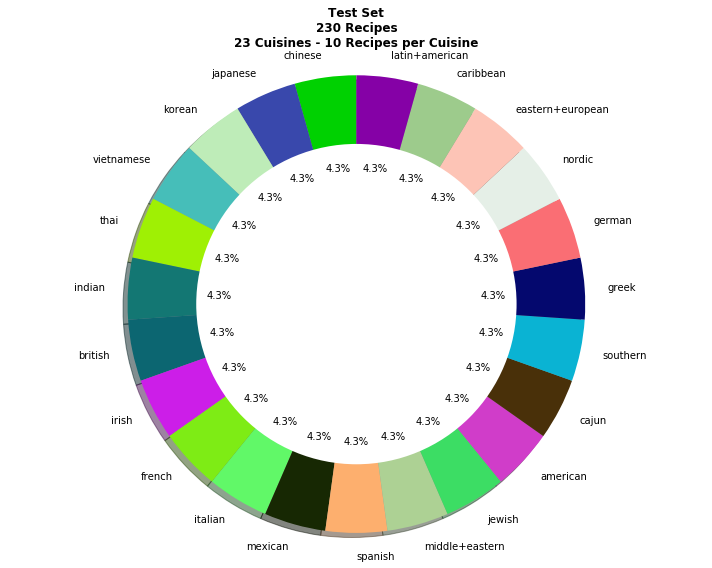

In [165]:
# Pie chart
labels2 = ['chinese', 'japanese', 'korean', 'vietnamese', 'thai', 'indian', 'british',
'irish', 'french', 'italian', 'mexican', 'spanish', 'middle+eastern', 'jewish', 'american', 'cajun',
'southern', 'greek', 'german', 'nordic', 'eastern+european', 'caribbean', 'latin+american']
sizes2 = [10] * len(labels2)

colors2 = ['#00d101', '#3948ac', '#beecb8', '#46beb9', '#9ff004',
          '#137773', '#0c6671', '#cc1ee8', '#7eec15', '#61f868', '#172803',
          '#fdaf6e', '#add194', '#3cdd64', '#d03dc9', '#493009', '#0ab3d3',
          '#04086e', '#fa6e74', '#e5efe7', '#fdc4b6', '#9dcb8c', '#8501a6']
    
fig2, ax2 = plt.subplots(figsize=(10,8))

ax2.pie(sizes2, labels=labels2, colors = colors2, autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.title('Test Set\n' + '230 Recipes\n' + '23 Cuisines - 10 Recipes per Cuisine', fontweight="bold")

plt.tight_layout()
plt.show()

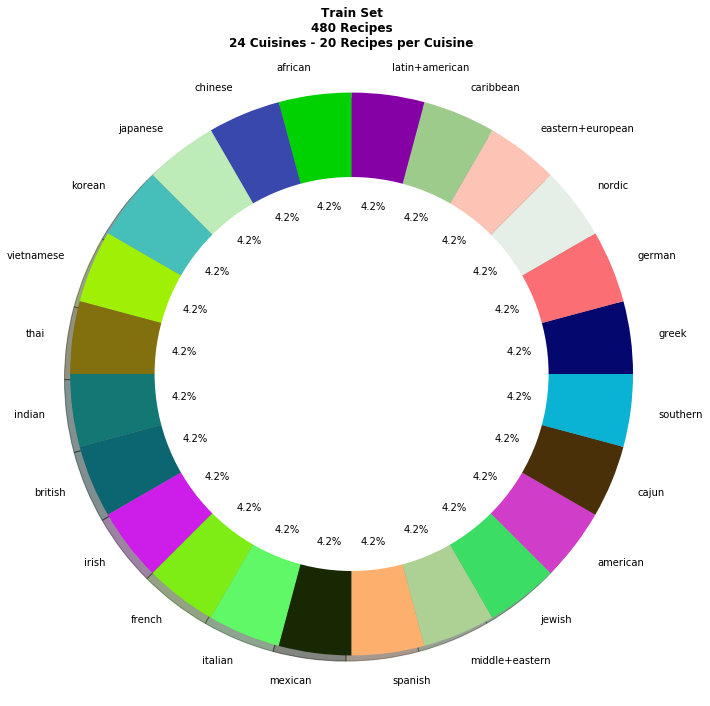

In [166]:
# Pie chart
labels = all_cuisines
sizes = [20] * len(labels)

colors = ['#00d101', '#3948ac', '#beecb8', '#46beb9', '#9ff004', '#81700d',
          '#137773', '#0c6671', '#cc1ee8', '#7eec15', '#61f868', '#172803',
          '#fdaf6e', '#add194', '#3cdd64', '#d03dc9', '#493009', '#0ab3d3',
          '#04086e', '#fa6e74', '#e5efe7', '#fdc4b6', '#9dcb8c', '#8501a6']

colors2 = ['#753B3D','#449FAF','#7C4049','#3AA8AE','#814655','#36B0AA','#844C62','#3BB8A4','#85546F','#47BF9D','#835C7C','#58C694','#806588','#6BCC8A','#7A6F94','#81D280','#72799D','#97D676','#6882A5','#AFDA6D','#5C8CAB','#C7DD66','#5096AE','#E0DF61']
    
fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Train Set\n' + '480 Recipes\n' + '24 Cuisines - 20 Recipes per Cuisine', fontweight="bold")

plt.tight_layout()
plt.show()